# System Dynamics: Ebola outbreak in Nigeria 2014

Ordinary differential equations (ODEs) are an invaluable tool for modelling and analysis of complex systems. 
In System dynamics terminology ODEs model stocks and flows. 
Unfortunately, their handling is not trivial and outside academia it is not very common to make use of it. 
However, with just a few lines of code it is possible to plot the functions which allows straightforward interpretation of the interdependencies.
To make this work, the initial conditions and the coefficients of the equations must be known.


<a href="http://dx.doi.org/10.1016/j.epidem.2015.03.001">Althaus et al. (2015)</a> estimated coefficients for the following set of differential equations modelling the Ebola outbreak in Nigeria 2014.

\begin{align}
\frac{\partial S}{\partial t} & = -\beta(t) S I \\
\frac{\partial E}{\partial t} & = \beta(t) S I - \sigma E \\
\frac{\partial I}{\partial t} & = \sigma E - \gamma I \\
\frac{\partial R}{\partial t} & = (1-f) \gamma I \\
\frac{\partial D}{\partial t} & = f \gamma I \\
\end{align}

$S$ = susceptible, $E$ = exposed, $I$ = infectious, $R$ = recovered, $D$ = dead

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S1755436515000341-gr1.jpg" />

These are the coefficients:

\begin{align}
\beta(t) & = \beta_{0} e^{-k(t - \tau)} \\
\beta_0 & = 1.22 * 10^{-6} \\
\sigma & = 0.11 \\
\gamma & = 0.13 \\
f & = 0.39 \\
\tau & = 3 \\
k & = 0.19
\end{align}

$\beta$: transmission rate with infected individuals, 
$\gamma$: ‘‘recovery or death’’ rate, 
$\sigma$: incubation rate, 
$f$: case fatality rate, 
$\tau$: Time (in days) at which control measures were introduced, 
k: transmission reduction rate

All initial stocks at t=0 are empty except S(0) = $10^{6}$ and I(0) = 1. 
The development is computed over 100 days. 
Perhaps surprising is that the recovered become immune to Ebola.

The transmission rate ($\beta$) is expected to be constant until the implementation of control interventions at t=$\tau$ and exponentionally decaying afterwards. 
The comparison of the proposed model with one having a constant transmission rate points out the tremendous importance of rapid implementation of control measures in order to reduce the spread of the disease.

Reference: <br />
Althaus C.L., Low N, Musa E.O., Shuaib F., Gsteiger S. (2015). <a href="http://dx.doi.org/10.1016/j.epidem.2015.03.001">Ebola virus disease outbreak in Nigeria: transmission dynamics and rapid control</a>. Epidemics 11(0): 80–84

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

## 1. Constant transmission rate: $\beta_0$

In [2]:
b = 1.22e-06
s = 1/9.31 # 1/(mean incubation period)
g = 1/7.41 # 1/(mean infectious period)
f = 0.39

y0 = [10**6, 0, 1, 0, 0] # initial condition vector: S, E, I, R, D
t  = np.linspace(0, 100, 101) # time grid

def model(y, t):
     S = y[0]
     E = y[1]
     I = y[2]
     R = y[3]
     D = y[4]
     dS = -b*S*I
     dE = b*S*I -s*E
     dI = s*E -g*I
     dR = (1-f)*g*I
     dD = f*g*I
     return [dS, dE, dI, dR, dD]

soln = odeint(model, y0, t) # solve the DEs

dat = pd.DataFrame(soln, columns = ['susceptible', 'exposed', 'infectious', 'recovered', 'dead'])
dat = dat.join(pd.DataFrame(t, columns = ["days"]))

dat.describe()

,susceptible,exposed,infectious,recovered,dead,days
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,525607.047351,91478.391308,71344.946014,190058.075350,121512.539978,50.000000
std,464441.142143,128696.255465,87327.900245,232610.786925,148718.371969,29.300171
min,154.000689,0.000000,0.932171,0.000000,0.000000,0.000000
25%,1537.287068,697.216720,199.229624,67.974887,43.459354,25.000000
50%,687143.412532,22858.443133,28894.010857,25317.965247,16186.895814,50.000000
75%,998993.119415,138280.811314,128730.716695,437094.196342,279453.666514,75.000000
max,1000000.000000,419505.411156,260298.086730,592345.031588,378712.397245,100.000000


Text(0,0.5,'people')

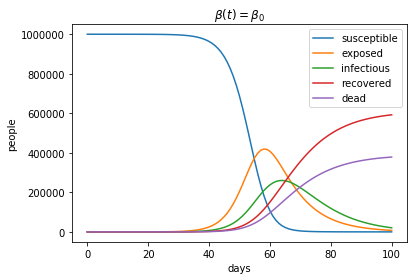

In [3]:
#plt.rcParams['figure.figsize'] = 12, 7
dat.plot(x='days', title='$\\beta(t) = \\beta_0$').set_ylabel("people")

## 2. Time-dependent transmission rate: $\beta(t) = \beta_{0} e^{-k(t - \tau)}$

Text(0,0.5,'$\\beta$')

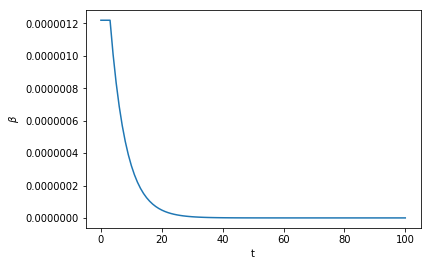

In [4]:
tau = 3
k = 0.19

def beta(t):
    if t < tau:
        return b
    else:
        return b * np.exp(-k*(t-tau))

plt.plot([beta(el) for el in t])
plt.xlabel('t')
plt.ylabel('$\\beta$')

In [5]:
def model(y, t):
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]
    D = y[4]
    dS = -beta(t)*S*I
    dE = beta(t)*S*I -s*E
    dI = s*E -g*I
    dR = (1-f)*g*I
    dD = f*g*I
    return [dS, dE, dI, dR, dD]

soln = odeint(model, y0, t)

dat = pd.DataFrame(soln, columns = ['susceptible', 'exposed', 'infectious', 'recovered', 'dead'])
dat = dat.join(pd.DataFrame(t, columns = ["days"]))

dat.describe()

,susceptible,exposed,infectious,recovered,dead,days
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,999981.764553,1.851835,1.552770,9.656813,6.174028,50.000000
std,4.543197,2.636075,1.769304,4.352457,2.782719,29.300171
min,999979.897966,0.000000,0.005258,0.000000,0.000000,0.000000
25%,999979.897967,0.019699,0.068719,7.364509,4.708457,25.000000
50%,999979.898403,0.288311,0.763721,12.210361,7.806624,50.000000
75%,999980.249639,3.075743,2.785025,12.816943,8.194439,75.000000
max,1000000.000000,8.063181,5.192525,12.868121,8.227159,100.000000


Text(0,0.5,'people')

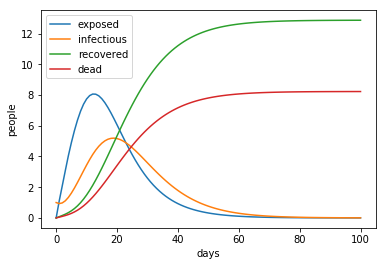

In [6]:
dat.drop('susceptible', 1).plot(x='days').set_ylabel("people")